In [2]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import ROOT

Welcome to JupyROOT 6.10/08


In [3]:
#inputdir = '/home/tmettler/Desktop/ub_data/ub_xsec/ConsolidatedSliceAnalyser/ext/'

# CRT trigger correction using flash - crt matching
on a event by event basis

In [4]:
#file = uproot.open( inputdir + 'NeutSlices_QP_allExt_withVertex.root_ana.root')
#file.keys("a") 

In [5]:
#slices = file['t_slice']
#print 'Number of entries: ', slices.numentries
#slices.keys()

In [6]:
#inputdir = '/home/tmettler/Desktop/ub_data/mcc9.1/trigger_correction/'
#outputdir = '/home/tmettler/Desktop/ub_data/mcc9.1/trigger_correction/trigger_corr_plot_overlay_G/'

inputdir = '/home/tmettler/Desktop/ub_data/mcc9.1/numuana_corr/'
outputdir = '/home/tmettler/Desktop/ub_data/mcc9.1/numuana_corr/trigger_corr_plot_overlay_G/'
try:
    os.stat(outputdir)
except:
    os.mkdir(outputdir)
#filename = 'NeutrinoCRTMatcher_QP_MC_BNB_10k.root'
#filename = 'NeutrinoCRTMatcher_QP_Overlay_bigWindow.root'
#filename = 'NeutrinoCRTMatcher_QP_6500_bigWindow.root'
filename = 'NuCCana_run3_G_overlay_QP_all.root'

isMC = 0
useT1 = 0

In [7]:
test = ROOT.TChain("crttrigger/my_event","my_event")
test.Add( inputdir + filename)

#test.ls()
print "Number of Entries:", test.GetEntries()
# uncomment one of them
cutname = 'has_nuslice'

cut = ' && ' + cutname
#cut = ''

title_cut = ''
if(cut!=''):
    title_cut = ' with '+ cutname


Number of Entries: 284772


Warning in <TClass::Init>: no dictionary for class ROOT::TIOFeatures is available


In [8]:
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("","",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

In [9]:
test.Show(100)

======> EVENT:100
 run_MC          = 0
 event_counter   = 11
 Run Number      = 17158
 SubRun Number   = 16
 Event Number    = 808
 fTriTim_sec s   = 1.52896e+09
 fTriTim_nsec ns = 6.45935e+08
 evt_time_sec    = 1528963818
 evt_time_nsec   = 658209000
 flash time us   = 926
 flash_PE ns     = 73.4934
 flash_y cm      = -0.0490662
 flash_z cm      = 97.2069
 is in BNB       = 0
 nr_crthit in BNB = 1
 crthit_ts0 ns   = 6.46792e+08
 crthit_ts1 ns   = 2.33138e+08
 adc_length      = 32
 peshit          = 149.253
 crtt0_time us   = 925.933
 crtt0_trig = 2  = 2
 crtt0_DCA ncm   = 17.22
 crtt0_plane 3=top = 3
 flash_tot       = 28
 flash_counter   = 8
 t0_counter      = 15
 t0_outlayer     = 1
 crthit_corr     = 69049.3
 crthit_corr_med = 69032.8


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/numuana_corr/trigger_corr_plot_overlay_G/h_diff_flash_crt_corr.png has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/numuana_corr/trigger_corr_plot_overlay_G/h_diff_flash_crt_corr_log.png has been created


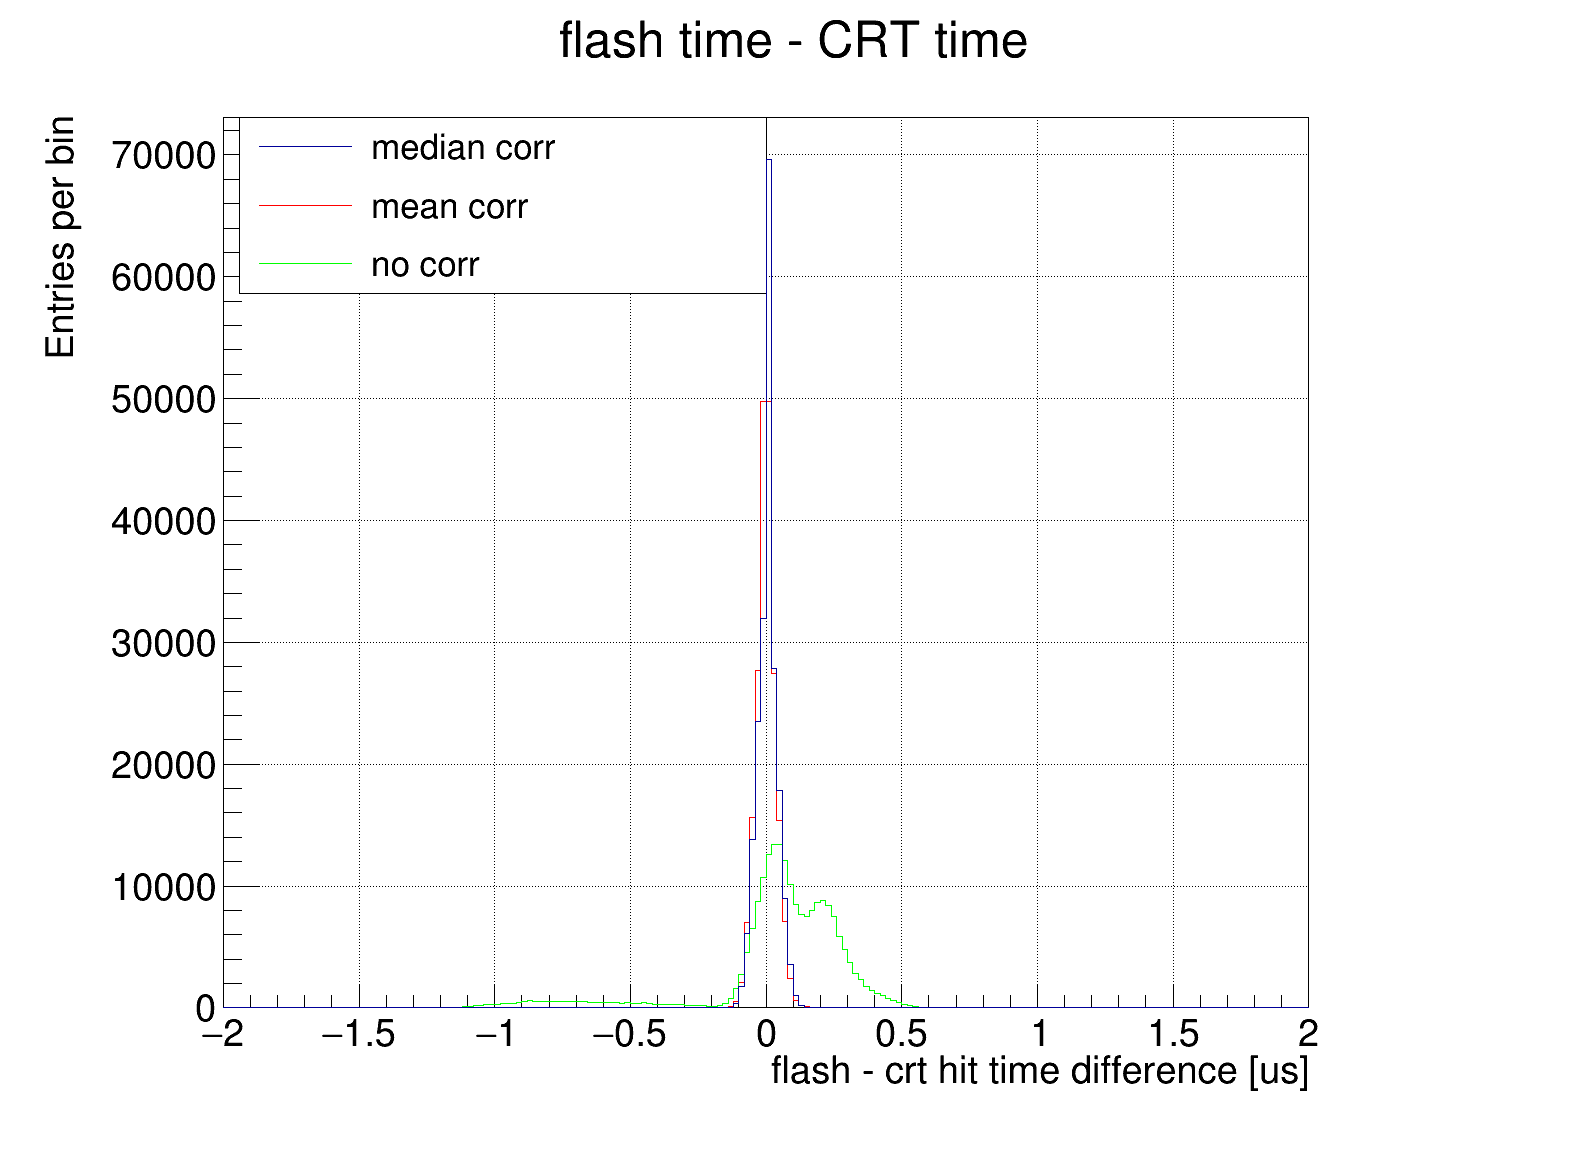

In [10]:
time_start = -2
time_end = 2
time_bins = 200

h_diff_flash_crt_med = ROOT.TH1F("h_diff_flash_crt_med","flash time - CRT time",time_bins,time_start,time_end)
h_diff_flash_crt_mean = ROOT.TH1F("h_diff_flash_crt_mean","T0 time - CRT time",time_bins,time_start,time_end)
h_diff_flash_crt = ROOT.TH1F("h_diff_flash_crt","T0 time - CRT time",time_bins,time_start,time_end)

test.Draw('flash_time-(crthit_ts0+crthit_corr_med-fTriTim_nsec)/1000>>h_diff_flash_crt_med','adc_length==32')
test.Draw('flash_time-(crthit_ts0+crthit_corr-fTriTim_nsec)/1000>>h_diff_flash_crt_mean','adc_length==32')
test.Draw('flash_time-(crthit_ts0+69000-fTriTim_nsec)/1000>>h_diff_flash_crt','adc_length==32')

h_diff_flash_crt_mean.SetLineColorAlpha(2, 1);
h_diff_flash_crt.SetLineColorAlpha(3, 1);

h_diff_flash_crt_med.SetXTitle("flash - crt hit time difference [us]");
h_diff_flash_crt_med.SetYTitle("Entries per bin");

legend = ROOT.TLegend(0.15,0.75,0.48,0.9);
#legend = ROOT.TLegend(0.5, 0.5, 0.75, 0.75)
legend.AddEntry(h_diff_flash_crt_med,"median corr","l");
legend.AddEntry(h_diff_flash_crt_mean,"mean corr","l");
legend.AddEntry(h_diff_flash_crt,"no corr","l");

#h_x.SetStats(1);
h_diff_flash_crt_med.Draw();
legend.Draw();
h_diff_flash_crt_mean.Draw("same");
h_diff_flash_crt.Draw("same");
h_diff_flash_crt_med.Draw("same");

c1.Draw()
c1.SaveAs(outputdir + "h_diff_flash_crt_corr.png");
c1.SetLogy()
c1.Draw()
c1.SaveAs(outputdir + "h_diff_flash_crt_corr_log.png");
c1.SetLogy(0)



Warning in <TROOT::Append>: Replacing existing TH1: h_diff_flash_crt_med (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_diff_flash_crt_mean (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_diff_flash_crt (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/numuana_corr/trigger_corr_plot_overlay_G/h_diff_flash_crt_corr.png has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/numuana_corr/trigger_corr_plot_overlay_G/h_diff_flash_crt_corr_log.png has been created


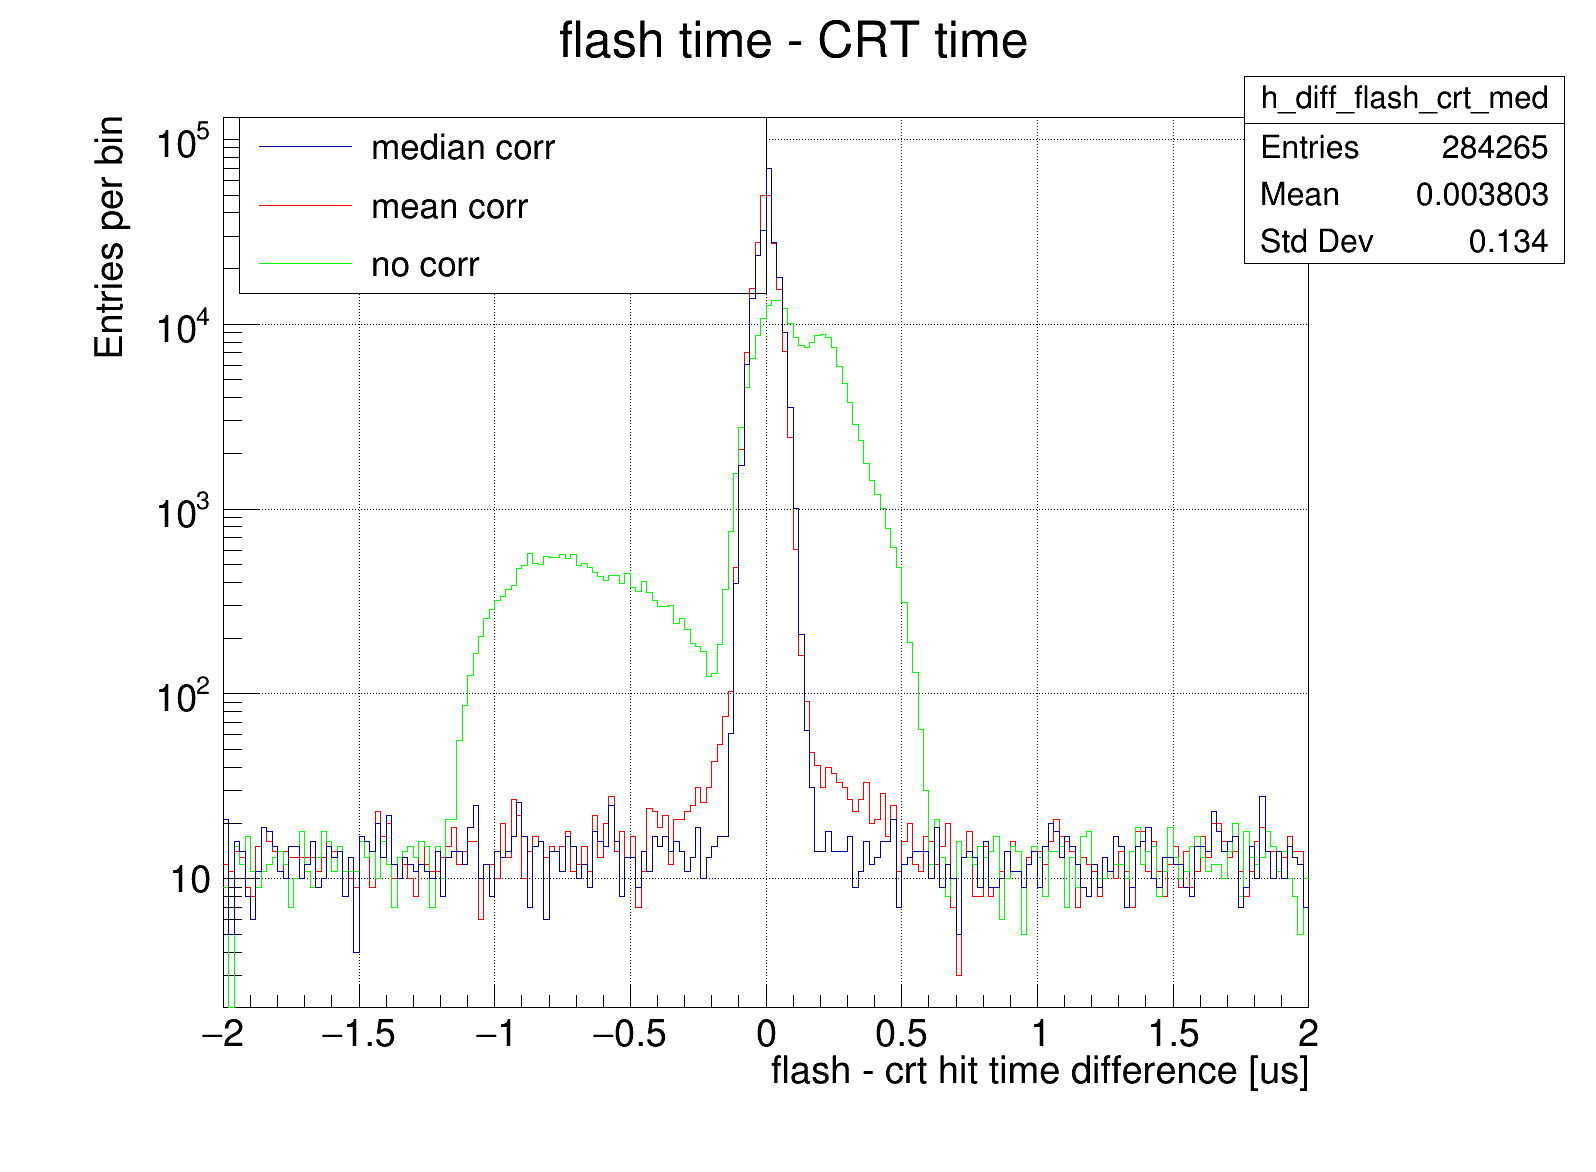

In [19]:
time_start = -2
time_end = 2
time_bins = 200

h_diff_flash_crt_med = ROOT.TH1F("h_diff_flash_crt_med","flash time - CRT time",time_bins,time_start,time_end)
h_diff_flash_crt_mean = ROOT.TH1F("h_diff_flash_crt_mean","T0 time - CRT time",time_bins,time_start,time_end)
h_diff_flash_crt = ROOT.TH1F("h_diff_flash_crt","T0 time - CRT time",time_bins,time_start,time_end)

test.Draw('flash_time-(crthit_ts0+crthit_corr_med-fTriTim_nsec)/1000>>h_diff_flash_crt_med','adc_length==32')
test.Draw('flash_time-(crthit_ts0+crthit_corr-fTriTim_nsec)/1000>>h_diff_flash_crt_mean','adc_length==32')
test.Draw('flash_time-(crthit_ts0+69000-fTriTim_nsec)/1000>>h_diff_flash_crt','adc_length==32')

h_diff_flash_crt_mean.SetLineColorAlpha(2, 1);
h_diff_flash_crt.SetLineColorAlpha(3, 1);

h_diff_flash_crt_med.SetXTitle("flash - crt hit time difference [us]");
h_diff_flash_crt_med.SetYTitle("Entries per bin");

legend = ROOT.TLegend(0.15,0.75,0.48,0.9);
#legend = ROOT.TLegend(0.5, 0.5, 0.75, 0.75)
legend.AddEntry(h_diff_flash_crt_med,"median corr","l");
legend.AddEntry(h_diff_flash_crt_mean,"mean corr","l");
legend.AddEntry(h_diff_flash_crt,"no corr","l");

#h_x.SetStats(1);
h_diff_flash_crt_med.Draw();
legend.Draw();
h_diff_flash_crt_mean.Draw("same");
h_diff_flash_crt.Draw("same");
h_diff_flash_crt_med.Draw("same");

c1.Draw()
c1.SaveAs(outputdir + "h_diff_flash_crt_corr.png");
c1.SetLogy()
c1.Draw()
c1.SaveAs(outputdir + "h_diff_flash_crt_corr_log.png");


Warning in <TROOT::Append>: Replacing existing TH1: h_diff_flash_crt_med (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_diff_flash_crt_mean (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_diff_flash_crt (Potential memory leak).
Error in <TGaxis::PaintAxis>: Time offset has not the right format
Error in <TGaxis::PaintAxis>: Time offset has not the right format
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/numuana_corr/trigger_corr_plot_overlay_G/h_diff_flash_crt_runnumber_corr_med.png has been created
Error in <TGaxis::PaintAxis>: Time offset has not the right format
Error in <TGaxis::PaintAxis>: Time offset has not the right format
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/numuana_corr/trigger_corr_plot_overlay_G/h_diff_flash_crt_runnumber_corr_mean.png has been created
Error in <TGaxis::PaintAxis>: Time offset has not the right format
Error in <TGaxis::PaintAxis>: T

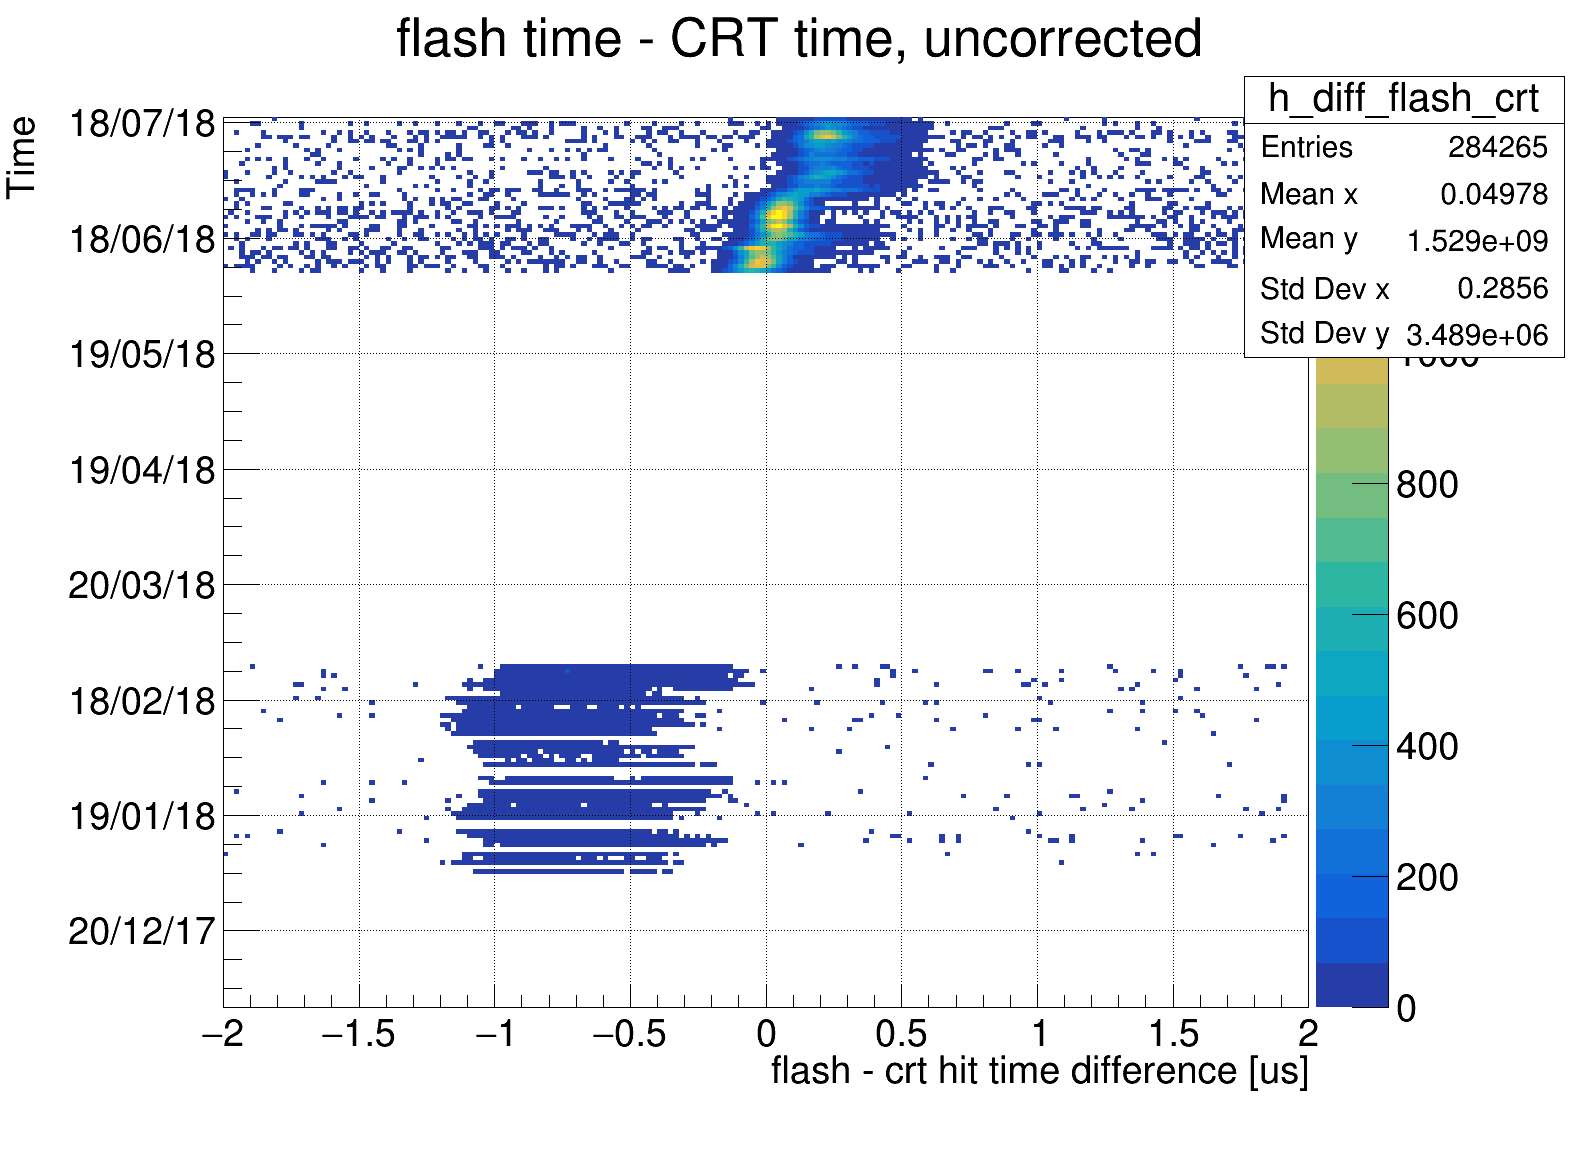

In [20]:
start_run = 1512e6
end_run = 1532e6
run_bins = 200
time_start = -2
time_end = 2
time_bins = 200
c1.SetLogy(0)
h_diff_flash_crt_med = ROOT.TH2F("h_diff_flash_crt_med","flash time - CRT time, median corrected",time_bins,time_start,time_end,run_bins,start_run,end_run)
h_diff_flash_crt_mean = ROOT.TH2F("h_diff_flash_crt_mean","flash time - CRT time, mean corrected",time_bins,time_start,time_end,run_bins,start_run,end_run)
h_diff_flash_crt = ROOT.TH2F("h_diff_flash_crt","flash time - CRT time, uncorrected",time_bins,time_start,time_end,run_bins,start_run,end_run)

test.Draw('fTriTim_sec:flash_time-(crthit_ts0+crthit_corr_med-fTriTim_nsec)/1000>>h_diff_flash_crt_med','adc_length==32')
test.Draw('fTriTim_sec:flash_time-(crthit_ts0+crthit_corr-fTriTim_nsec)/1000>>h_diff_flash_crt_mean','adc_length==32')
test.Draw('fTriTim_sec:flash_time-(crthit_ts0+69000-fTriTim_nsec)/1000>>h_diff_flash_crt','adc_length==32')

h_diff_flash_crt_med.SetXTitle("flash - crt hit time difference [us]");
h_diff_flash_crt_med.SetYTitle("Time");

h_diff_flash_crt_mean.SetXTitle("flash - crt hit time difference [us]");
h_diff_flash_crt_mean.SetYTitle("Time");

h_diff_flash_crt.SetXTitle("flash - crt hit time difference [us]");
h_diff_flash_crt.SetYTitle("Time");

h_diff_flash_crt_med.GetYaxis().SetTimeDisplay(1)
h_diff_flash_crt_med.GetYaxis().SetTimeFormat("%d/%m/%y%F1970");
h_diff_flash_crt_mean.GetYaxis().SetTimeDisplay(1)
h_diff_flash_crt_mean.GetYaxis().SetTimeFormat("%d/%m/%y%F1970");
h_diff_flash_crt.GetYaxis().SetTimeDisplay(1)
h_diff_flash_crt.GetYaxis().SetTimeFormat("%d/%m/%y%F1970");

h_diff_flash_crt_med.Draw("colz")
c1.Draw()
c1.SaveAs(outputdir + "h_diff_flash_crt_runnumber_corr_med.png")
h_diff_flash_crt_mean.Draw("colz")
c1.Draw()
c1.SaveAs(outputdir + "h_diff_flash_crt_runnumber_corr_mean.png")
h_diff_flash_crt.Draw("colz")
#c1.SetLogz()
c1.Draw()
c1.SaveAs(outputdir + "h_diff_flash_crt_runnumber_nocorr.png")

First mean: 0.00424474938488
First std: 0.0378630468142
Second mean: 0.063020033856
Second std: 0.031158658391
 FCN=28263.9 FROM MIGRAD    STATUS=CONVERGED      85 CALLS          86 TOTAL
                     EDM=3.92461e-11    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.3 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     9.35465e+03   2.72368e+01  -3.01183e-02  -5.76708e-08
   2  Mean         4.24475e-03   9.02006e-05   7.39601e-08  -1.10226e-01
   3  Sigma        3.78630e-02   6.41787e-05  -1.05166e-07   1.04650e-02
 FCN=80.4406 FROM MIGRAD    STATUS=CONVERGED      76 CALLS          77 TOTAL
                     EDM=2.16953e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.4 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     8.32233e+01   2.84611e+

Warning in <TROOT::Append>: Replacing existing TH1: h_diff_flash_crt_cosmic (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_diff_flash_crt_beam (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/numuana_corr/trigger_corr_plot_overlay_G/h_diff_flash_crt_corr_beam.png has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/numuana_corr/trigger_corr_plot_overlay_G/h_diff_flash_crt_corr_beam_log.png has been created


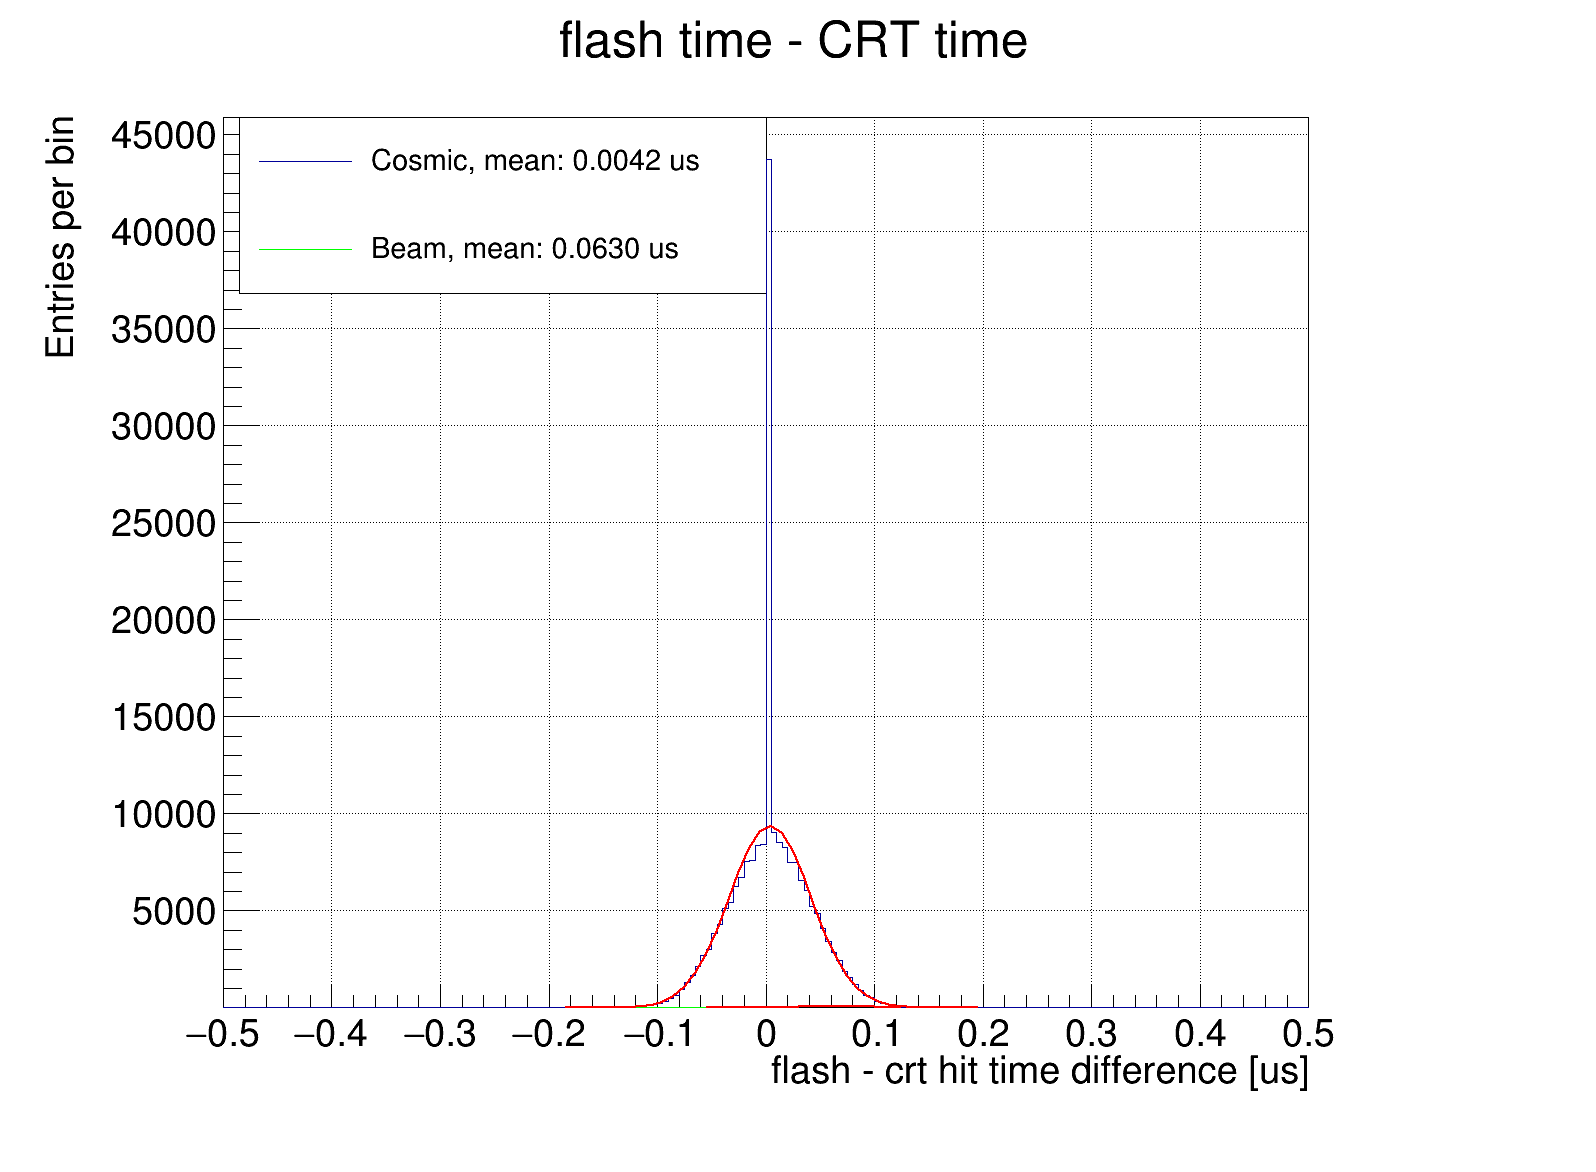

In [22]:
time_start = -0.5
time_end = 0.5
time_bins = 200
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptFit(0)

h_diff_flash_crt_cosmic = ROOT.TH1F("h_diff_flash_crt_cosmic","flash time - CRT time",time_bins,time_start,time_end)
h_diff_flash_crt_beam = ROOT.TH1F("h_diff_flash_crt_beam","T0 time - CRT time",time_bins,time_start,time_end)
#h_diff_flash_crt = ROOT.TH1F("h_diff_flash_crt","T0 time - CRT time",time_bins,time_start,time_end)

test.Draw('flash_time-(crthit_ts0+crthit_corr_med-fTriTim_nsec)/1000>>h_diff_flash_crt_cosmic','!flash_inTime && adc_length==32')
test.Draw('flash_time-(crthit_ts0+crthit_corr-fTriTim_nsec)/1000>>h_diff_flash_crt_beam','flash_inTime && adc_length==32')
#test.Draw('flash_time-(crthit_ts0+69000-fTriTim_nsec)/1000>>h_diff_flash_crt')

h_diff_flash_crt_beam.SetLineColorAlpha(3, 1);
#h_diff_flash_crt.SetLineColorAlpha(3, 1);

h_diff_flash_crt_cosmic.SetXTitle("flash - crt hit time difference [us]");
h_diff_flash_crt_cosmic.SetYTitle("Entries per bin");
h_diff_flash_crt_cosmic.SetMinimum(0.1)
legend = ROOT.TLegend(0.15,0.75,0.48,0.9);
#legend = ROOT.TLegend(0.5, 0.5, 0.75, 0.75)


#h_x.SetStats(1);
#h_diff_flash_crt_cosmic.Draw();

f1 = ROOT.TF1("f1","gaus",time_start,time_end)
h_diff_flash_crt_cosmic.Fit("f1","R");
print 'First mean:', f1.GetParameter(1)
print 'First std:', f1.GetParameter(2)
f2 = ROOT.TF1("f2","gaus",time_start,time_end)
h_diff_flash_crt_beam.Fit("f2","R+");
print 'Second mean:', f2.GetParameter(1)
print 'Second std:', f2.GetParameter(2)
entry_cosmic = 'Cosmic, mean: ' + '{0:.4f}'.format(f1.GetParameter(1)) + ' us'
entry_beam = 'Beam, mean: ' + '{0:.4f}'.format(f2.GetParameter(1)) + ' us'
legend.AddEntry(h_diff_flash_crt_cosmic,entry_cosmic,"l");
legend.AddEntry(h_diff_flash_crt_beam,entry_beam,"l");
#legend.AddEntry(h_diff_flash_crt,"no corr","l");

h_diff_flash_crt_cosmic.Draw();
legend.Draw();
h_diff_flash_crt_beam.Draw("same");
h_diff_flash_crt_cosmic.Draw("same");
#h_diff_flash_crt_med.Draw("same");
c1.SetLogy(0)
c1.Draw()
c1.SaveAs(outputdir + "h_diff_flash_crt_corr_beam.png");
c1.SetLogy(1)
c1.Draw()
c1.SaveAs(outputdir + "h_diff_flash_crt_corr_beam_log.png");
c1.SetLogy(0)

In [14]:
trig = ROOT.TChain("crttrigger/my_trigger","my_trigger")
trig.Add( inputdir + filename)
print "Number of Entries:", trig.GetEntries()

Number of Entries: 33768


Warning in <TROOT::Append>: Replacing existing TH1: h_tot_flash (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/numuana_corr/trigger_corr_plot_overlay_G/h_tot_flash.png has been created


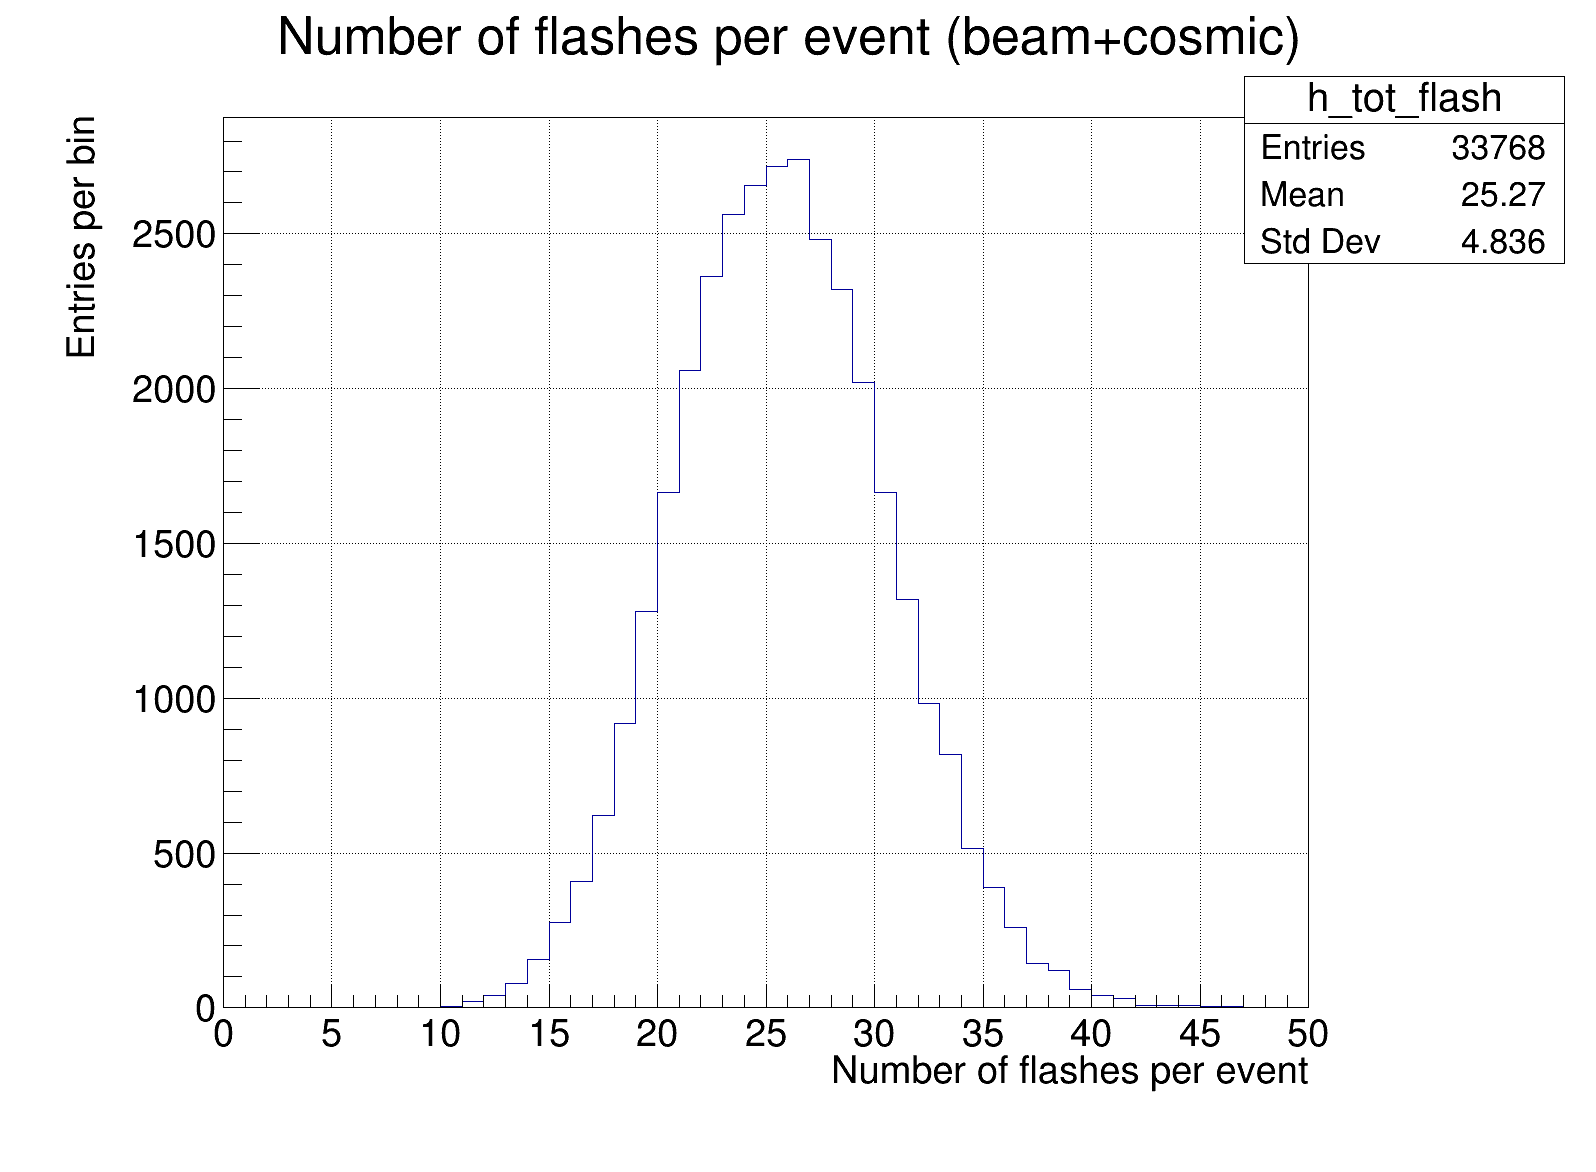

In [23]:
time_start = 0
time_end = 50
time_bins = 50

ROOT.gStyle.SetOptStat(1)
h_tot_flash = ROOT.TH1F("h_tot_flash","Number of flashes per event (beam+cosmic)",time_bins,time_start,time_end)
trig.Draw('flash_tot>>h_tot_flash')
h_tot_flash.SetXTitle("Number of flashes per event");
h_tot_flash.SetYTitle("Entries per bin");

h_tot_flash.Draw();
c1.Draw()
c1.SaveAs(outputdir + "h_tot_flash.png");
#c1.SetLogy()
#c1.Draw()
#c1.SaveAs(outputdir + "h_tot_flash_log.png");


Warning in <TROOT::Append>: Replacing existing TH1: h_match_flash (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/numuana_corr/trigger_corr_plot_overlay_G/h_match_flash.png has been created


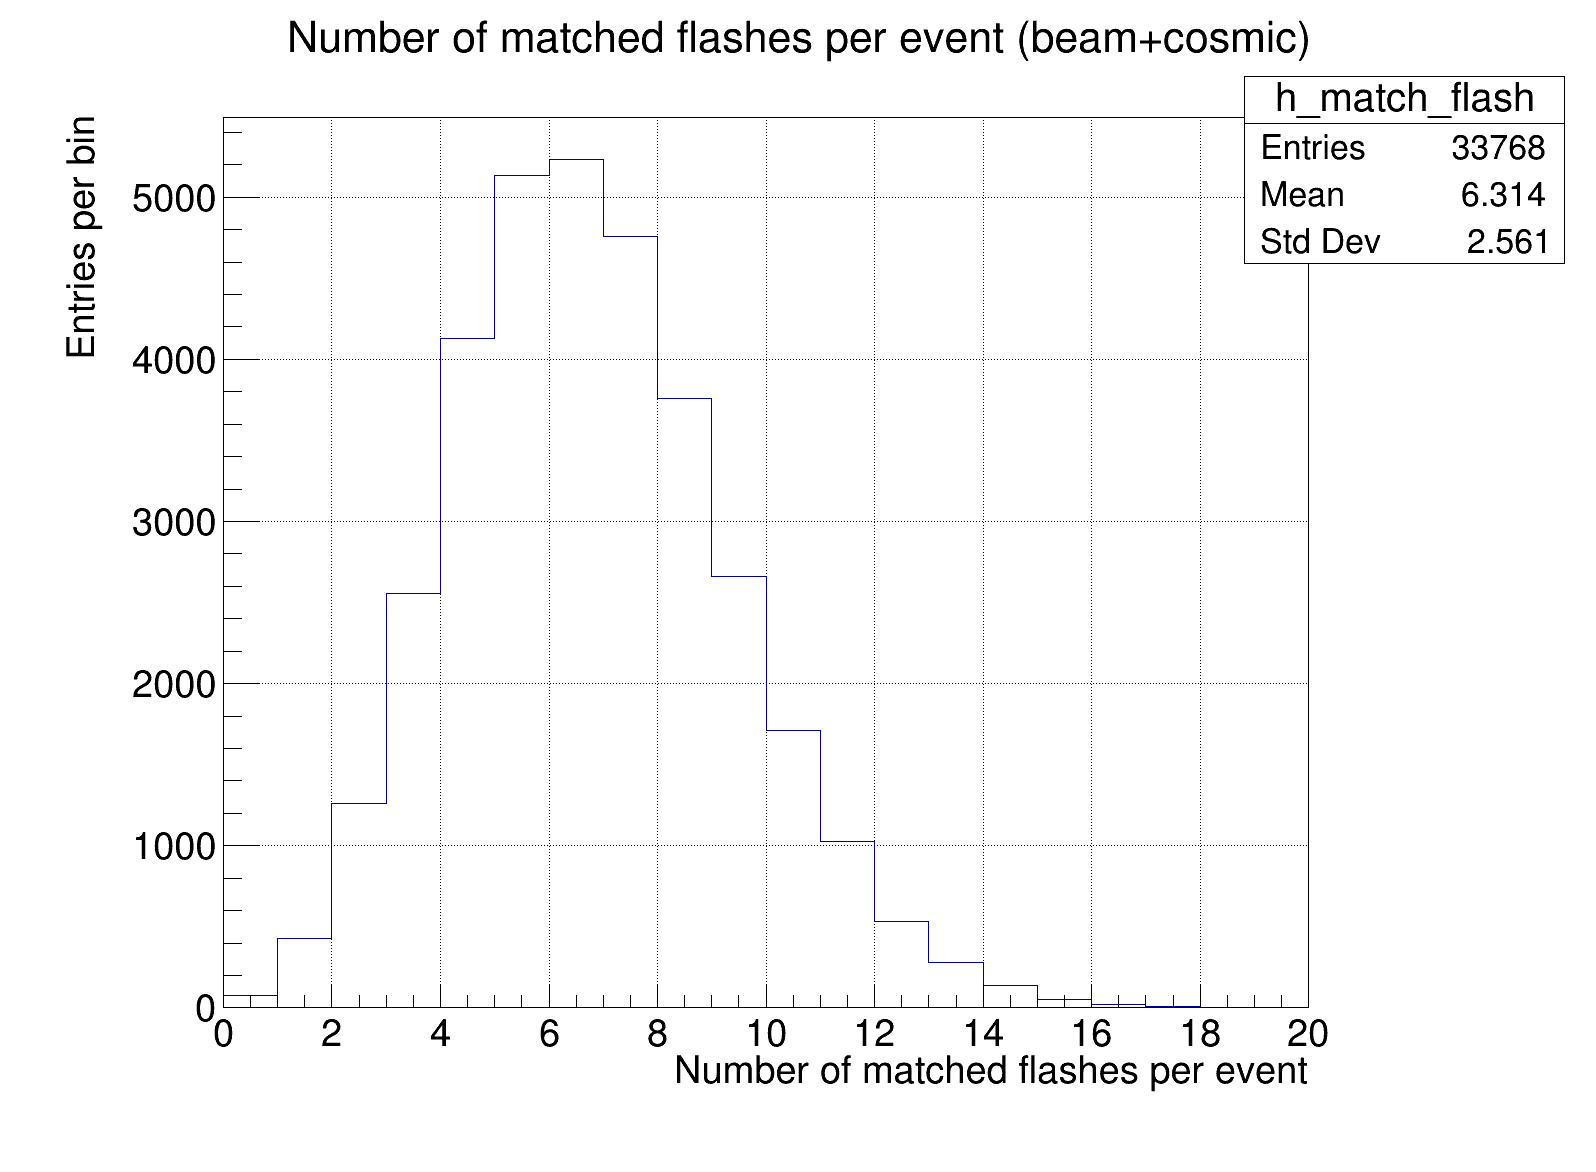

In [24]:
time_start = 0
time_end = 20
time_bins = 20

ROOT.gStyle.SetOptStat(1)
h_match_flash = ROOT.TH1F("h_match_flash","Number of matched flashes per event (beam+cosmic)",time_bins,time_start,time_end)
trig.Draw('flash_counter>>h_match_flash')
h_match_flash.SetXTitle("Number of matched flashes per event");
h_match_flash.SetYTitle("Entries per bin");

h_match_flash.Draw();
c1.Draw()
c1.SaveAs(outputdir + "h_match_flash.png");
#c1.SetLogy()
#c1.Draw()
#c1.SaveAs(outputdir + "h_tot_flash_log.png");


Warning in <TROOT::Append>: Replacing existing TH1: h_crtt0 (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/numuana_corr/trigger_corr_plot_overlay_G/h_crtt0.png has been created


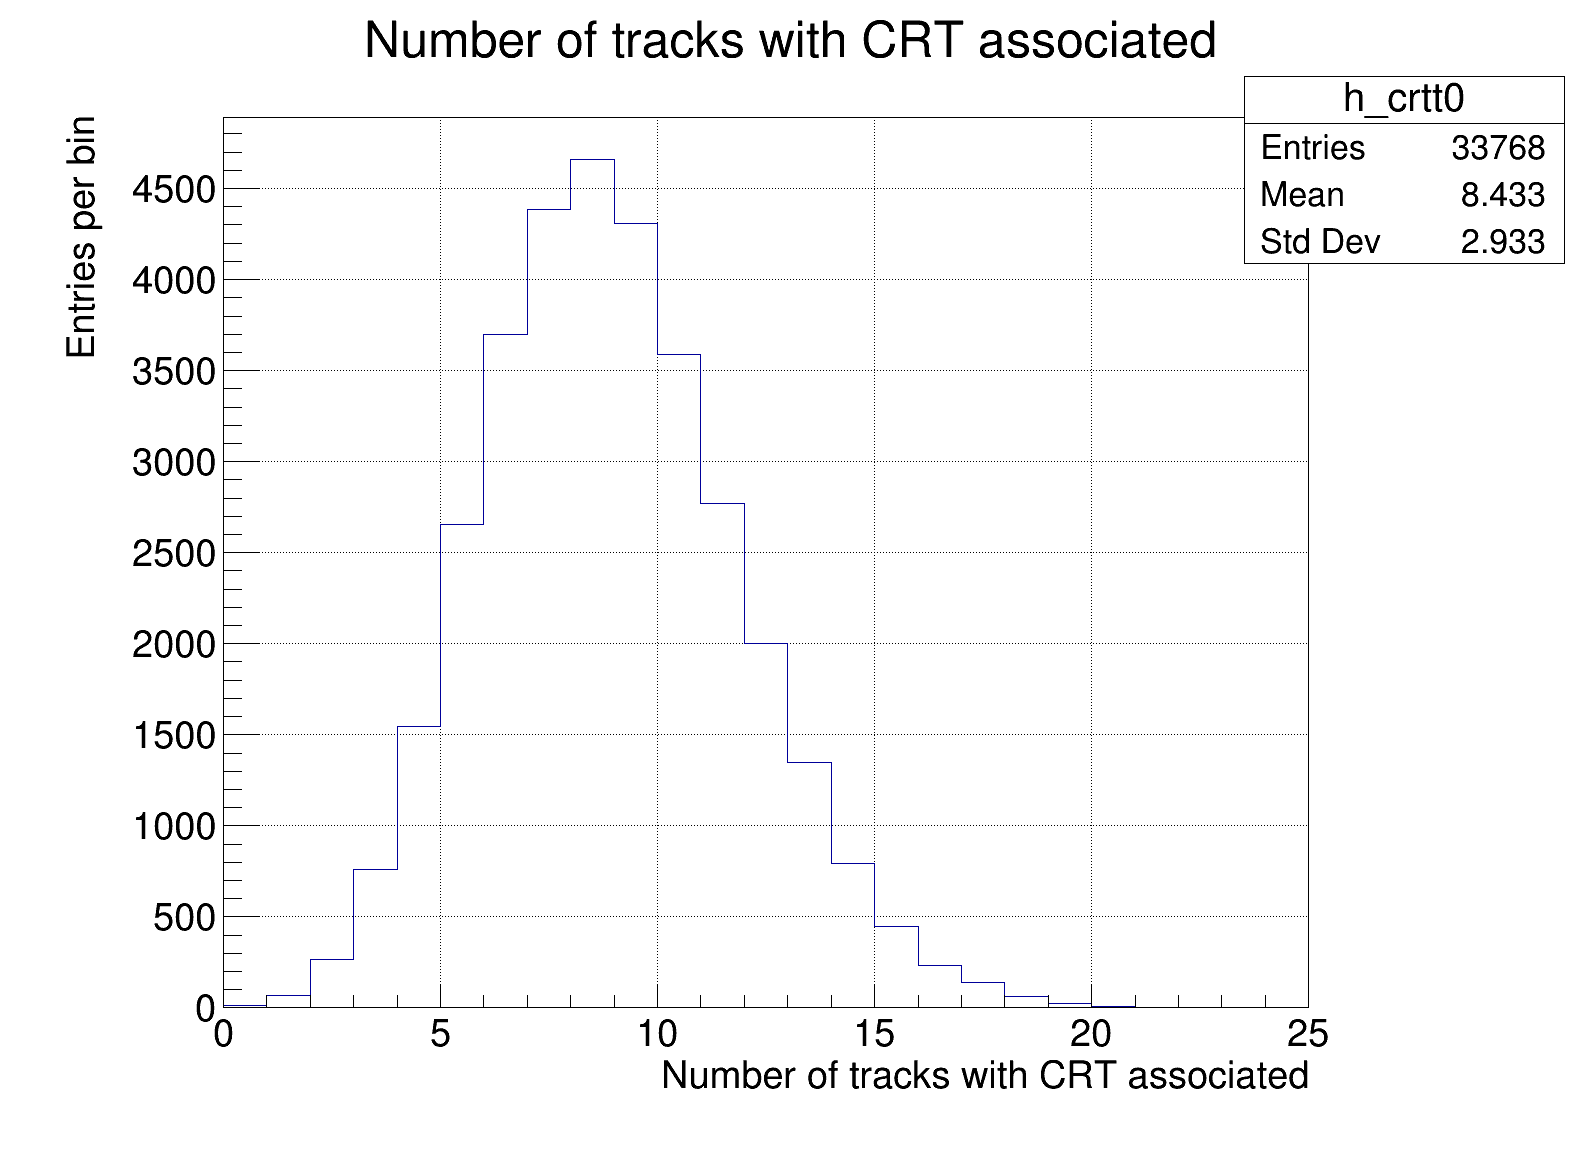

In [25]:
time_start = 0
time_end = 25
time_bins = 25

ROOT.gStyle.SetOptStat(1)
h_crtt0 = ROOT.TH1F("h_crtt0","Number of tracks with CRT associated",time_bins,time_start,time_end)
trig.Draw('t0_counter>>h_crtt0')
h_crtt0.SetXTitle("Number of tracks with CRT associated");
h_crtt0.SetYTitle("Entries per bin");

h_crtt0.Draw();
c1.Draw()
c1.SaveAs(outputdir + "h_crtt0.png");
#c1.SetLogy()
#c1.Draw()
#c1.SaveAs(outputdir + "h_tot_flash_log.png");

mean of MC offset: 0.00865625


Warning in <TROOT::Append>: Replacing existing TH1: h_diff_flash_crt_med (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_diff_flash_crt_mean (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_diff_flash_crt (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/numuana_corr/trigger_corr_plot_overlay_G/h_diff_flash_crt_corr_MC.png has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/numuana_corr/trigger_corr_plot_overlay_G/h_diff_flash_crt_corr_log_MC.png has been created


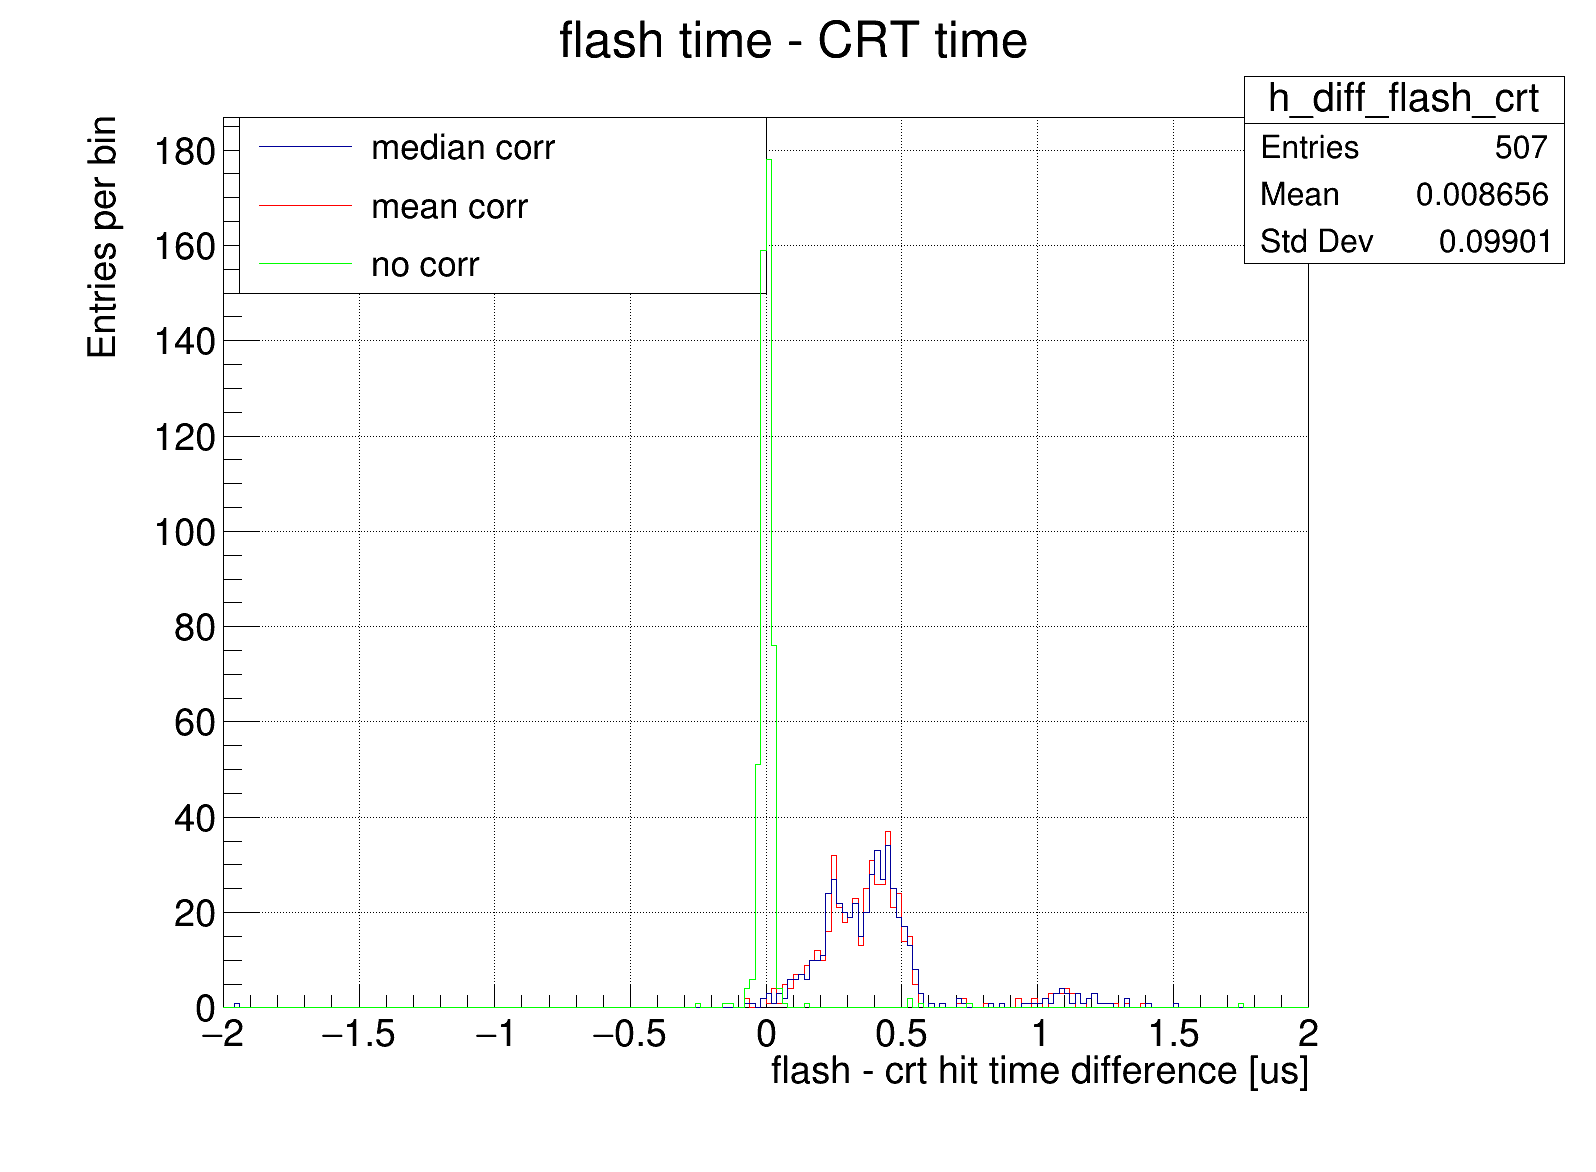

In [30]:
time_start = -2
time_end = 2
time_bins = 200

h_diff_flash_crt_med = ROOT.TH1F("h_diff_flash_crt_med","flash time - CRT time",time_bins,time_start,time_end)
h_diff_flash_crt_mean = ROOT.TH1F("h_diff_flash_crt_mean","flash time - CRT time",time_bins,time_start,time_end)
h_diff_flash_crt = ROOT.TH1F("h_diff_flash_crt","flash time - CRT time",time_bins,time_start,time_end)

test.Draw('flash_time-(crthit_ts0+crthit_corr_med-fTriTim_nsec)/1000>>h_diff_flash_crt_med','adc_length!=32')
test.Draw('flash_time-(crthit_ts0+crthit_corr-fTriTim_nsec)/1000>>h_diff_flash_crt_mean','adc_length!=32')
test.Draw('flash_time-(crthit_ts0+69457-fTriTim_nsec)/1000>>h_diff_flash_crt','adc_length!=32')

h_diff_flash_crt_mean.SetLineColorAlpha(2, 1);
h_diff_flash_crt.SetLineColorAlpha(3, 1);

h_diff_flash_crt.SetXTitle("flash - crt hit time difference [us]");
h_diff_flash_crt.SetYTitle("Entries per bin");

legend = ROOT.TLegend(0.15,0.75,0.48,0.9);
#legend = ROOT.TLegend(0.5, 0.5, 0.75, 0.75)
legend.AddEntry(h_diff_flash_crt_med,"median corr","l");
legend.AddEntry(h_diff_flash_crt_mean,"mean corr","l");
legend.AddEntry(h_diff_flash_crt,"no corr","l");

print "mean of MC offset:", h_diff_flash_crt.GetMean()

#h_x.SetStats(1);
h_diff_flash_crt.Draw();
legend.Draw();
h_diff_flash_crt_mean.Draw("same");
h_diff_flash_crt_med.Draw("same");
h_diff_flash_crt.Draw("same");

c1.Draw()
c1.SaveAs(outputdir + "h_diff_flash_crt_corr_MC.png");
c1.SetLogy()
c1.Draw()
c1.SaveAs(outputdir + "h_diff_flash_crt_corr_log_MC.png");
c1.SetLogy(0)